## Dataset

In [1]:
import torchvision.transforms as transforms
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from utils.data_prepare import load_class_list

class CaltechDataset(Dataset):
    """Caltech 101 dataset."""

    def __init__(self, root_dir, data_path, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.data_path = data_path
        self.transform = transform
        
        # Load the data
        self.img_paths = []
        self.labels = []
        self.idx_to_label = load_class_list()
        self.num_classes = len(self.idx_to_label)
        self.load_data()
        
    def load_data(self):
        """
        Load the data from the root directory.
        """
        
        with open(self.data_path, "r", encoding="utf-8") as f:
            self.info = f.readlines()
        for img_info in self.info:
            img_path, label = img_info.strip().split('\t')
            self.img_paths.append(img_path)
            self.labels.append(int(label))
        
            
    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(os.path.join(self.root_dir, img_path)).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [2]:
train_dataset = CaltechDataset(
    root_dir='./data/dataset/images', 
    data_path='./data/process/train_list.txt', 
)
val_dataset = CaltechDataset(
    root_dir='./data/dataset/images', 
    data_path='./data/process/val_list.txt', 
)

In [3]:
print(train_dataset.__len__())
print(val_dataset.__len__())

7199
800


32 BACKGROUND_Google


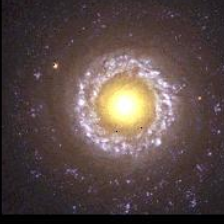

In [4]:
img_idx = 1
print(train_dataset[img_idx][1], train_dataset.idx_to_label[train_dataset[img_idx][1]])
transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
])(
    train_dataset[img_idx][0]
)

59 flamingo


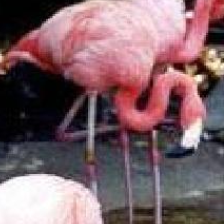

In [5]:
img_idx = 0
print(val_dataset[img_idx][1], val_dataset.idx_to_label[val_dataset[img_idx][1]])
transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
])(
    val_dataset[img_idx][0]
)

## Dataloader

In [6]:
transform_train=transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

transform_val=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

In [7]:
train_dataset = CaltechDataset(
    root_dir = './data/dataset/images', 
    data_path = './data/process/train_list.txt', 
    transform = transform_train
)
val_dataset =  CaltechDataset(
    root_dir = './data/dataset/images', 
    data_path = './data/process/val_list.txt', 
    transform = transform_val
)

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


In [9]:
for i_batch, sample_batched in enumerate(train_dataloader):
    print("batch: ", i_batch)
    print("image: ", sample_batched[0])
    print("img.shape: ", sample_batched[0].shape)
    print("label: ", sample_batched[1])
    print("label.shape: ", sample_batched[1].shape)
    break

batch:  0
image:  tensor([[[[-1.8097, -1.8610, -1.9638,  ..., -1.7069, -1.6042, -1.5357],
          [-1.7754, -1.8610, -1.9467,  ..., -1.6727, -1.5699, -1.5014],
          [-1.8439, -1.8610, -1.8953,  ..., -1.5014, -1.4843, -1.4500],
          ...,
          [ 2.0605,  1.9920,  1.9749,  ...,  1.2557,  1.3755,  1.4440],
          [ 1.7694,  1.7180,  1.8208,  ...,  1.3584,  1.3242,  1.3584],
          [ 1.4783,  1.4612,  1.7694,  ...,  1.3413,  1.0673,  1.0502]],

         [[-1.4755, -1.5280, -1.6506,  ..., -1.4580, -1.4055, -1.3354],
          [-1.4755, -1.5630, -1.6506,  ..., -1.4405, -1.3704, -1.2829],
          [-1.5455, -1.5805, -1.6155,  ..., -1.2829, -1.2654, -1.2304],
          ...,
          [ 2.0784,  1.9909,  1.9559,  ...,  1.2731,  1.3606,  1.5182],
          [ 1.7808,  1.7108,  1.7983,  ...,  1.3431,  1.3081,  1.4307],
          [ 1.4832,  1.4657,  1.7458,  ...,  1.3256,  1.0805,  1.1331]],

         [[-1.2119, -1.2467, -1.3339,  ..., -1.2816, -1.2293, -1.1770],
          [-